# Life Expectancy and GDP

The goal of this project is to explore the relationship between GDP and life expectancy during the time 2000-2015 of six different countries: Zimbabwe, China, Chile, United States, Germany and Mexico.

(1) How did GDP and life expectancy behaved during these years? <br>
(2) Is there a correlation between GDP and life expectancy? <br>
(3) Is this relationship the same for all countries? What does it look like when aggregated <br>

# Exploratory Data Analysis

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm

In [83]:
data = pd.read_csv('../data/all_data.csv')
data.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [84]:
data = data.rename(columns={'Life expectancy at birth (years)':'life_expectancy', 'Country':'country', 'GDP':'gdp',\
                           'Year':'year'})
data.head()

,country,year,life_expectancy,gdp
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [85]:
countries = list(data['country'].unique())
list(data['country'].unique())

['Chile', 'China', 'Germany', 'Mexico', 'United States of America', 'Zimbabwe']

In [86]:
data['country'] = data['country'].replace({'United States of America':'USA'})
countries = list(data['country'].unique())
print(f'{len(countries)} countries:')
print(countries)

years = list(data['year'].unique())
print(f'{len(years)} years:')
print(years)

6 countries:
['Chile', 'China', 'Germany', 'Mexico', 'USA', 'Zimbabwe']
16 years:
[2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]


In [87]:
year_df = pd.DataFrame(data.groupby('year').mean(numeric_only=True))
year_df.head()

,life_expectancy,gdp
year,,
2000,70.766667,2.371583e+12
2001,70.833333,2.448752e+12
2002,70.950000,2.561221e+12
2003,71.033333,2.743446e+12
2004,71.300000,2.991647e+12


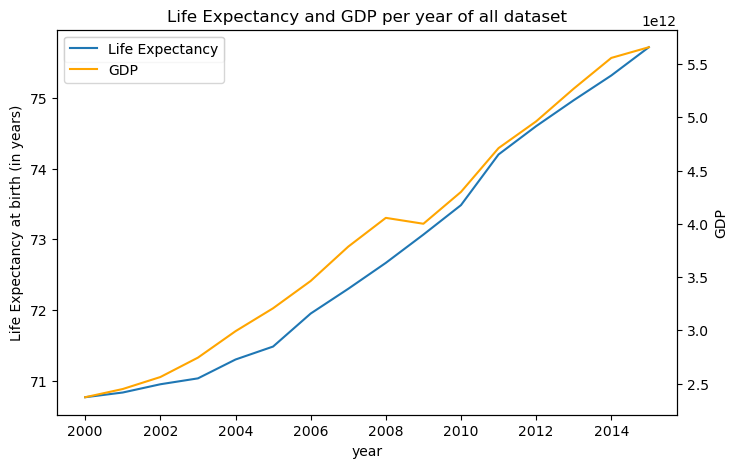

In [88]:
plt.figure(figsize=(8, 5))
plt.title('Life Expectancy and GDP per year of all dataset')
# Primary axis plot
l1 = sns.lineplot(data=year_df, x=year_df.index, y='life_expectancy', label='Life Expectancy')
plt.ylabel('Life Expectancy at birth (in years)')

# Secondary axis plot
ax2 = plt.gca().twinx()
l2 = sns.lineplot(data=year_df, x=year_df.index, y='gdp', ax=ax2, color='orange', label='GDP')
ax2.set_ylabel('GDP')

# Get handles and labels for the legend
lines1, labels1 = l1.get_legend_handles_labels()
lines2, labels2 = l2.get_legend_handles_labels()

# Combine handles and labels
lines = lines1 + lines2
labels = labels1 + labels2

# Add legend to the primary axis
plt.legend(lines, labels, loc='upper left')

plt.show()

- Overall, in the dataset, GDP initially increased at a faster rate than life expectancy. However, GDP experienced a significant decline from 2008 to 2009 before resuming its growth. <br>
- In contrast, life expectancy consistently increased throughout these years. <br>
- The linear aspect of this graph for both variables throughout the years might be partially explained by considering that aggregating data from multiple countries can neutralize individual fluctuations.

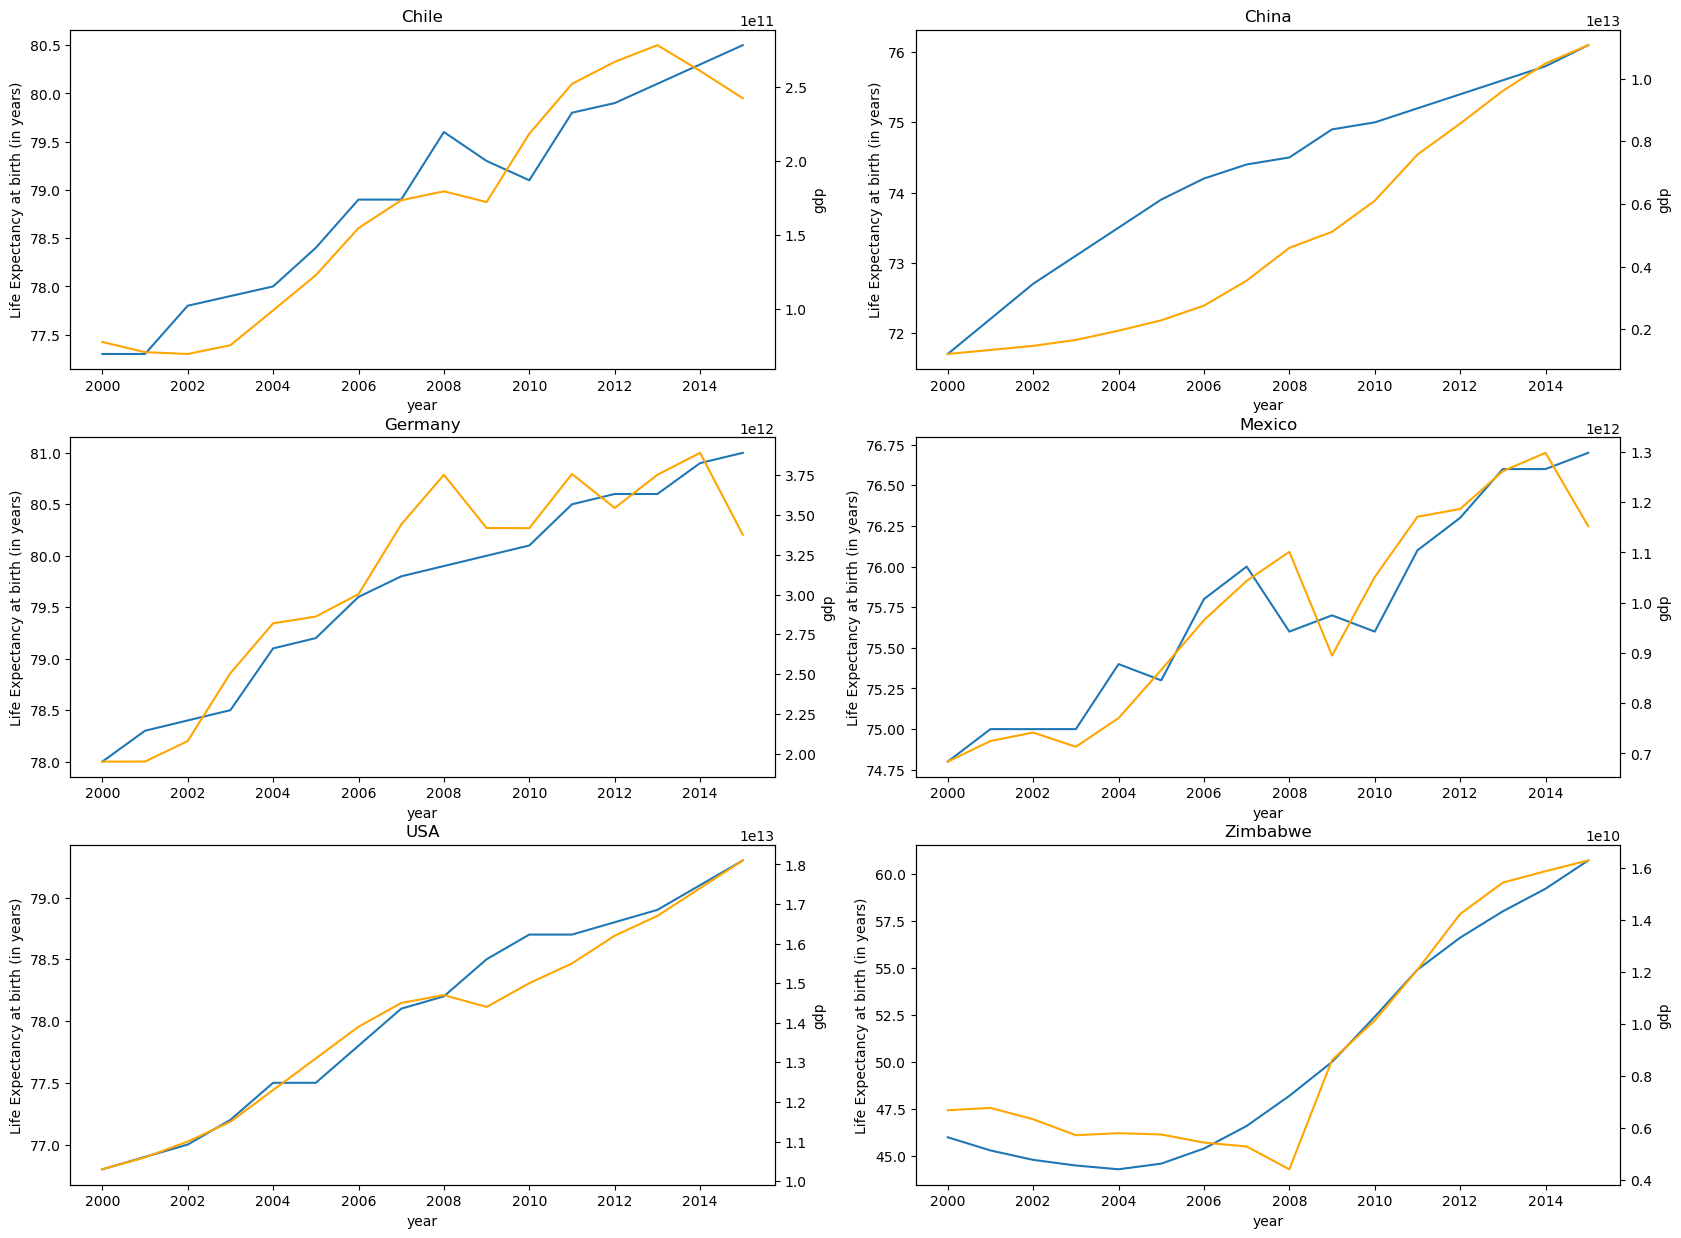

In [89]:
plt.figure(figsize=(20, 15))
rows = 3
cols = 2
n = rows * cols
for i, country in enumerate(countries):
    plt.subplot(rows, cols, i+1)
    plt.title(country)
    sns.lineplot(data=data[data['country']==country], x='year', y='life_expectancy')
    plt.ylabel('Life Expectancy at birth (in years)')
    ax2 = plt.twinx()
    sns.lineplot(data=data[data['country']==country], x='year', y='gdp', ax=ax2, color='orange')

- Underlying conditions <br>
- The relationship between GDP and Life Expectancy is different for each country, but overall during these years they all increased. <br>
- There is a difference between the countries in their rate, direction and variability of change and in the scale of the variables, specially the GDP. GDP varies from a magnitude of 10^13 for the US to 10^10 for Zimbabwe. <br>
- Life expectancy, with the exception of Zimbabwe, varied between early seventies to early eighties, with China with the lowest age and Germany with the highest. <br>
- Zimbabwe had the greatest increase, with the gap being 15 years from lowest to highest age. After 2004, Mexico and Chile were the only countries of the six to present a drop in life expectancy (drop of around half a year).<br>

- In relative terms, life expectancy varied more in Mexico during these years, followed by Chile and the other countries do not seem to present such high variability. We can check that by computing descriptive statistics of these variables. <br>

In [90]:
data.groupby('country').agg({'life_expectancy':['mean', 'std'], 'gdp':['mean', 'std']})

life_expectancy                     gdp              
                    mean       std          mean           std
country                                                       
Chile           78.94375  1.058911  1.697888e+11  7.687884e+10
China           74.26250  1.318016  4.957714e+12  3.501096e+12
Germany         79.65625  0.975000  3.094776e+12  6.674862e+11
Mexico          75.71875  0.620987  9.766506e+11  2.095716e+11
USA             78.06250  0.832566  1.407500e+13  2.432694e+12
Zimbabwe        50.09375  5.940311  9.062580e+09  4.298310e+09

## Countries' Life Expectancy at birth (in years)

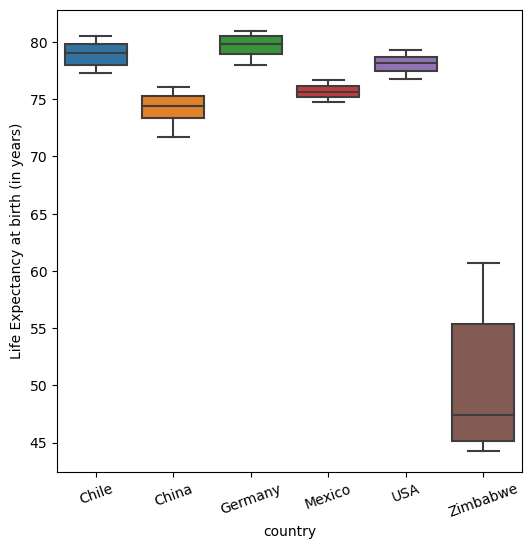

In [91]:
plt.figure(figsize=(6, 6))
sns.boxplot(data=data, x="country", y="life_expectancy")
plt.ylabel('Life Expectancy at birth (in years)')
plt.xticks(rotation=20);

- Lalala

# GDP

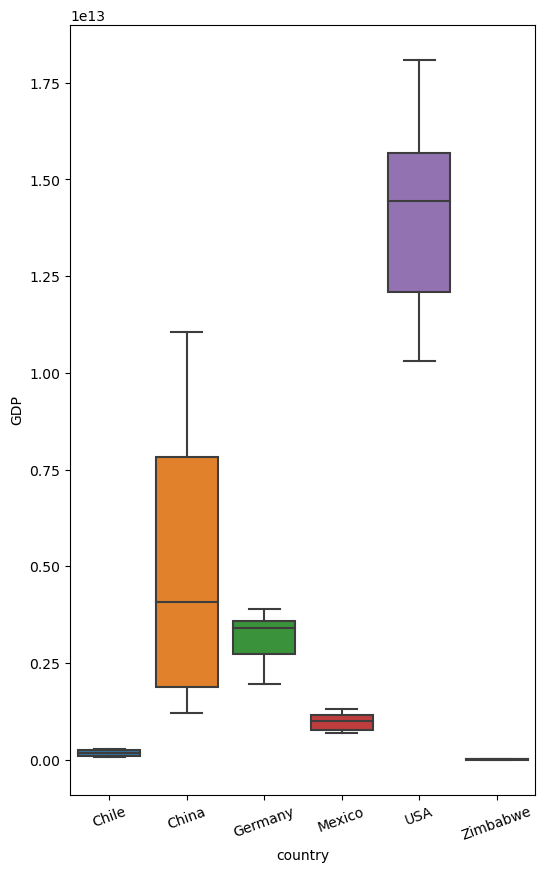

In [120]:
plt.figure(figsize=(6, 10))
sns.boxplot(data=data, x='country', y='gdp')
plt.ylabel('GDP')
plt.xticks(rotation=20);

## Regressing Life Expectancy on GDP

In [94]:
ols_countries = {}

for country in countries:
    df = data[data['country']==country]
    model = sm.OLS(df['gdp'], df['life_expectancy'])
    results = model.fit()
    ols_countries[country] = {
        'r_squared': results.rsquared,
        'log_likelihood': results.llf}

In [95]:
ols_countries

{'Chile': {'r_squared': 0.8477359741435635,
  'log_likelihood': -422.77748717596086},
 'China': {'r_squared': 0.6958344633043194,
  'log_likelihood': -483.961690089418},
 'Germany': {'r_squared': 0.9625050807593715,
  'log_likelihood': -456.94789787351965},
 'Mexico': {'r_squared': 0.9615091793180773,
  'log_likelihood': -438.7007446077221},
 'USA': {'r_squared': 0.9759564766732667, 'log_likelihood': -477.507607416759},
 'Zimbabwe': {'r_squared': 0.9002577224735823,
  'log_likelihood': -372.6312730791478}}

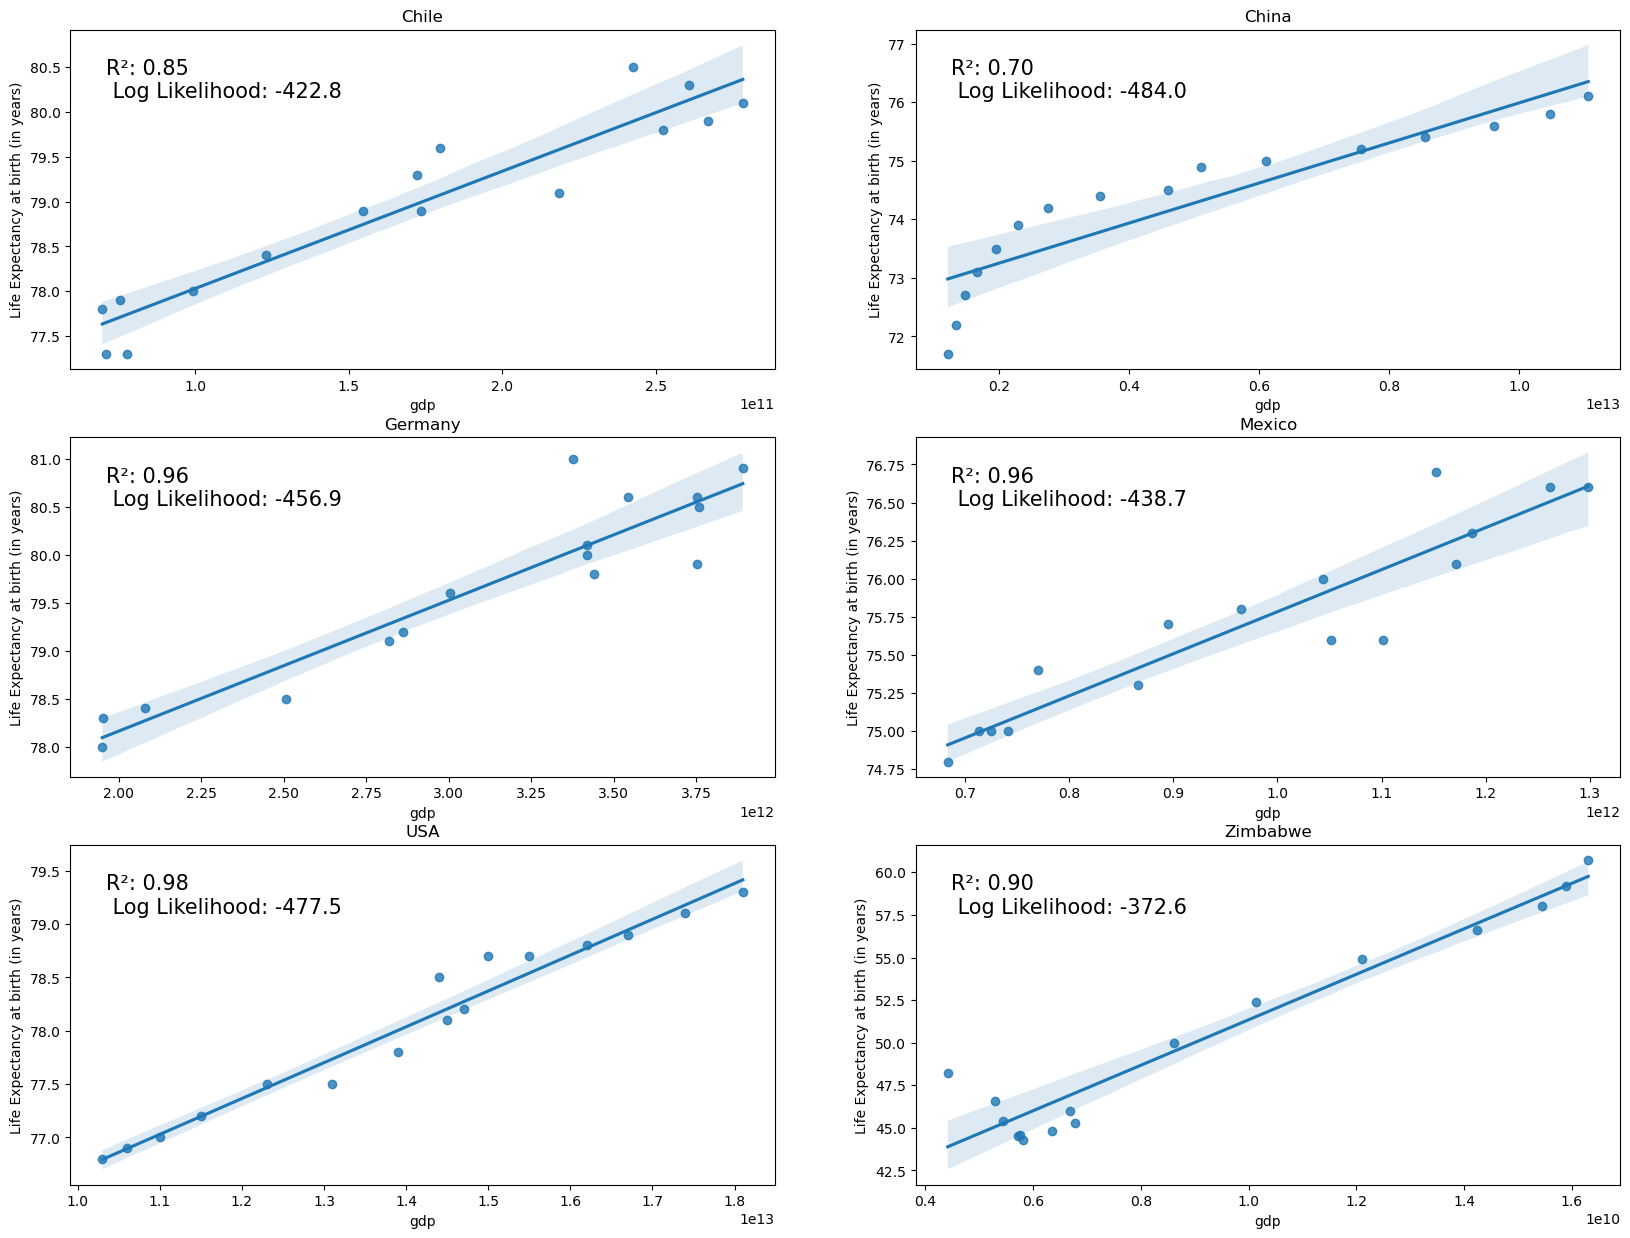

In [147]:
plt.figure(figsize=(20, 15))
rows = 3
cols = 2
n = rows * cols
for i, country in enumerate(countries):
    r_squared = ols_countries[country]['r_squared']
    log_like = ols_countries[country]['log_likelihood']
    plt.subplot(rows, cols, i+1)
    plt.title(country)
    sns.regplot(data=data[data['country']==country], x='gdp', y='life_expectancy')
    plt.annotate(f'R²: {r_squared:.2f} \n Log Likelihood: {log_like:.1f}',xy=(0.05,0.8),xycoords='axes fraction', fontsize=15)
    plt.ylabel('Life Expectancy at birth (in years)')

In [ ]:
# 